<a href="https://colab.research.google.com/github/Jyoshnade/HDS5210_InClass/blob/master/final/Jyoshna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INTRODUCTION
The project seeks to understand how terrorism impacts the happiness of populations by analyzing datasets related to terrorism incidents and happiness scores at the country level. This investigation combines various data processing, integration, and analysis techniques to assess correlations and inform policy decisions.

Data accesing

In [1]:
## Import Libraries
import pandas as pd
from kagglehub import dataset_download
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def download_dataset(dataset_name):
    """Download the dataset from Kaggle."""
    path = dataset_download(dataset_name)
    return path

In [3]:
def load_dataset(file_path):
    """Load the dataset from the given file path."""
    return pd.read_csv(file_path, encoding='ISO-8859-1')

In [4]:
def load_happiness_data(file_path):
    """Load the happiness dataset from the given file path."""
    return pd.read_json(file_path)

In [5]:
def drop_unnecessary_columns(data, columns):
    """Drop unnecessary columns from the given dataset."""
    return data.drop(columns=columns)

In [6]:
def handle_missing_values(data, columns, fill_value=0):
    """Handle missing values by replacing NaN with a specified fill value."""
    for column in columns:
        data[column] = data[column].fillna(fill_value)
    return data

In [7]:
def convert_columns_to_numeric(data, columns):
    """Convert specified columns to numeric, handling errors."""
    for column in columns:
        data[column] = pd.to_numeric(data[column], errors='coerce')
    return data

In [9]:
def rename_and_select_columns(data, columns_mapping, selected_columns):
    """
    Rename and select specific columns from the given dataset.

    Parameters:
    data (pd.DataFrame): The input dataset.
    columns_mapping (dict): A dictionary where keys are old column names and values are new column names.
    selected_columns (list): A list of columns to select after renaming.

    Returns:
    pd.DataFrame: The dataset with renamed and selected columns.
    """
    data = data.rename(columns=columns_mapping)
    return data[selected_columns]

In [10]:
def process_terrorism_data(file_path):
    """Process the terrorism dataset."""
    terrorism_data = load_dataset(file_path)
    print("Terrorism Dataset Info:")
    print(terrorism_data.info())

    terrorism_data = drop_unnecessary_columns(terrorism_data, ["eventid", "country"])

    columns_mapping = {
        "iyear": "year",
        "country_txt": "country",
        "nkill": "fatalities",
        "nwound": "injuries"
    }
    selected_columns = ["year", "country", "fatalities", "injuries"]
    terrorism_data = rename_and_select_columns(terrorism_data, columns_mapping, selected_columns)

    terrorism_data = handle_missing_values(terrorism_data, ["fatalities", "injuries"])
    terrorism_data = convert_columns_to_numeric(terrorism_data, ["fatalities", "injuries"])

    print("Processed Terrorism Dataset Info:")
    print(terrorism_data.info())

    return terrorism_data

In [11]:
def process_happiness_data(file_path):
    """Process the happiness dataset."""
    happiness_data = load_happiness_data(file_path)

    columns_mapping = {
        "Country name": "country",
        "Life Ladder": "happiness_score"
    }
    selected_columns = ["country", "year", "happiness_score"]
    happiness_data = rename_and_select_columns(happiness_data, columns_mapping, selected_columns)

    happiness_data = convert_columns_to_numeric(happiness_data, ["happiness_score"])

    return happiness_data

Merging Data

In [12]:
def merge_datasets(terrorism_data, happiness_data):
    """Merge the terrorism and happiness datasets."""
    merged_data = pd.merge(
        terrorism_data,
        happiness_data,
        on=["country", "year"],
        how="inner"
    )
    return merged_data

In [13]:
def normalize_happiness_score(data):
    """Normalize the happiness score to a range of 0 to 1."""
    data["happiness_score_normalized"] = (data["happiness_score"] - data["happiness_score"].min()) / (data["happiness_score"].max() - data["happiness_score"].min())
    return data

In [14]:
def categorize_countries_by_happiness(data):
    """Categorize countries based on the average happiness score."""
    data["happiness_category"] = pd.cut(data["happiness_score"], bins=[0, 4, 6, 10], labels=["Low", "Medium", "High"])
    return data

In [15]:
def create_total_victims_column(data):
    """Create a new column for the total number of victims (fatalities + injuries)."""
    data["total_victims"] = data["fatalities"] + data["injuries"]
    return data

Data Aggregation

In [16]:
def aggregate_fatalities_injuries_by_country(data):
    """Aggregate total fatalities and injuries by country."""
    country_aggregates = data.groupby("country")[["fatalities", "injuries"]].sum().reset_index()
    print("Total Fatalities and Injuries by Country:")
    print(country_aggregates.head())
    return country_aggregates

In [17]:
def aggregate_happiness_score_by_country(data):
    """Aggregate average happiness score by country."""
    happiness_aggregates = data.groupby("country")["happiness_score"].mean().reset_index()
    print("Average Happiness Score by Country:")
    print(happiness_aggregates.head())
    return happiness_aggregates

In [18]:
def aggregate_incidents_by_country_year(data):
    """Aggregate total number of incidents by country and year."""
    incidents_aggregates = data.groupby(["country", "year"]).size().reset_index(name='total_incidents')
    print("Total Number of Incidents by Country and Year:")
    print(incidents_aggregates.head())
    return incidents_aggregates

In [19]:
def plot_total_fatalities_by_country(data):
    """Plot total fatalities by country."""
    plt.figure(figsize=(12, 6))
    sns.barplot(x="country", y="fatalities", data=data.sort_values(by="fatalities", ascending=False).head(10))
    plt.title("Total Fatalities by Country")
    plt.xticks(rotation=45)
    plt.show()

In [20]:
def plot_total_injuries_by_country(data):
    """Plot total injuries by country."""
    plt.figure(figsize=(12, 6))
    sns.barplot(x="country", y="injuries", data=data.sort_values(by="injuries", ascending=False).head(10))
    plt.title("Total Injuries by Country")
    plt.xticks(rotation=45)
    plt.show()

In [21]:
def plot_average_happiness_score_over_years(data, countries):
    """Plot average happiness score over the years for selected countries."""
    plt.figure(figsize=(12, 6))
    for country in countries:
        country_data = data[data["country"] == country]
        sns.lineplot(x="year", y="happiness_score", data=country_data, label=country)
    plt.title("Average Happiness Score Over the Years")
    plt.legend()
    plt.show()

In [22]:
def plot_happiness_score_vs_total_victims(data):
    """Plot happiness score vs. total victims."""
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x="happiness_score", y="total_victims", data=data)
    plt.title("Happiness Score vs. Total Victims")
    plt.show()

In [23]:
def plot_correlation_heatmap(data):
    """Plot heatmap of the correlation matrix."""
    plt.figure(figsize=(12, 6))
    numeric_data = data.select_dtypes(include=[float, int])
    correlation_matrix = numeric_data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()

In [28]:
# Download and load the terrorism dataset
dataset_name = "START-UMD/gtd"
path = download_dataset(dataset_name)
terrorism_file_path = f"/content/globalterrorismdb_0718dist.csv"
terrorism_data = process_terrorism_data(terrorism_file_path)

# Load and process the happiness dataset
happiness_file_path = "//content/world-happiness-report.json"
happiness_data = process_happiness_data(happiness_file_path)
merged_data = merge_datasets(terrorism_data, happiness_data)

<ipython-input-3-59b3e2607e70>:3: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path, encoding='ISO-8859-1')


Terrorism Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB
None
Processed Terrorism Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        181691 non-null  int64  
 1   country     181691 non-null  object 
 2   fatalities  181691 non-null  float64
 3   injuries    181691 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.5+ MB
None


In [29]:
# Check the cleaned terrorism_data
terrorism_data

,year,country,fatalities,injuries
0,1970,Dominican Republic,1.0,0.0
1,1970,Mexico,0.0,0.0
2,1970,Philippines,1.0,0.0
3,1970,Greece,0.0,0.0
4,1970,Japan,0.0,0.0
...,...,...,...,...
181686,2017,Somalia,1.0,2.0
181687,2017,Syria,2.0,7.0
181688,2017,Philippines,0.0,0.0
181689,2017,India,0.0,0.0


In [30]:
# Check the cleaned happiness_data
happiness_data

,country,year,happiness_score
0,Afghanistan,2008,3.724
1,Afghanistan,2009,4.402
2,Afghanistan,2010,4.758
3,Afghanistan,2011,3.832
4,Afghanistan,2012,3.783
...,...,...,...
1944,Zimbabwe,2016,3.735
1945,Zimbabwe,2017,3.638
1946,Zimbabwe,2018,3.616
1947,Zimbabwe,2019,2.694


Transformation



In [31]:
# Perform data transformations
merged_data = normalize_happiness_score(merged_data)
merged_data = create_total_victims_column(merged_data)
merged_data = categorize_countries_by_happiness(merged_data)

In [32]:
# Perform aggregations
country_aggregates = aggregate_fatalities_injuries_by_country(merged_data)

Total Fatalities and Injuries by Country:
       country  fatalities  injuries
0  Afghanistan     35933.0   40170.0
1      Albania         1.0       2.0
2      Algeria       222.0     410.0
3    Argentina         0.0       4.0
4      Armenia         7.0       3.0


In [33]:
aggregate_happiness_score_by_country(merged_data)

Average Happiness Score by Country:
       country  happiness_score
0  Afghanistan         3.683598
1      Albania         4.704909
2      Algeria         5.521510
3    Argentina         6.435778
4      Armenia         4.383286


,country,happiness_score
0,Afghanistan,3.683598
1,Albania,4.704909
2,Algeria,5.521510
3,Argentina,6.435778
4,Armenia,4.383286
...,...,...
126,Venezuela,5.365250
127,Vietnam,5.175000
128,Yemen,3.742742
129,Zambia,3.933000


In [34]:
aggregate_incidents_by_country_year(merged_data)

Total Number of Incidents by Country and Year:
       country  year  total_incidents
0  Afghanistan  2008              414
1  Afghanistan  2009              503
2  Afghanistan  2010              542
3  Afghanistan  2011              421
4  Afghanistan  2012             1469


,country,year,total_incidents
0,Afghanistan,2008,414
1,Afghanistan,2009,503
2,Afghanistan,2010,542
3,Afghanistan,2011,421
4,Afghanistan,2012,1469
...,...,...,...
837,Zimbabwe,2010,1
838,Zimbabwe,2011,1
839,Zimbabwe,2013,3
840,Zimbabwe,2014,1


In [35]:
# Display the updated dataset
print(merged_data.head())

   year         country  fatalities  injuries  happiness_score  \
0  2005  United Kingdom         0.0       0.0            6.984   
1  2005          France         0.0       3.0            7.093   
2  2005        Pakistan         5.0       0.0            5.225   
3  2005        Pakistan         3.0       2.0            5.225   
4  2005          Greece         0.0       0.0            6.006   

   happiness_score_normalized  total_victims happiness_category  
0                    0.814089            0.0               High  
1                    0.834620            3.0               High  
2                    0.482765            5.0             Medium  
3                    0.482765            5.0             Medium  
4                    0.629874            0.0               High  


DATA VISUALISATION

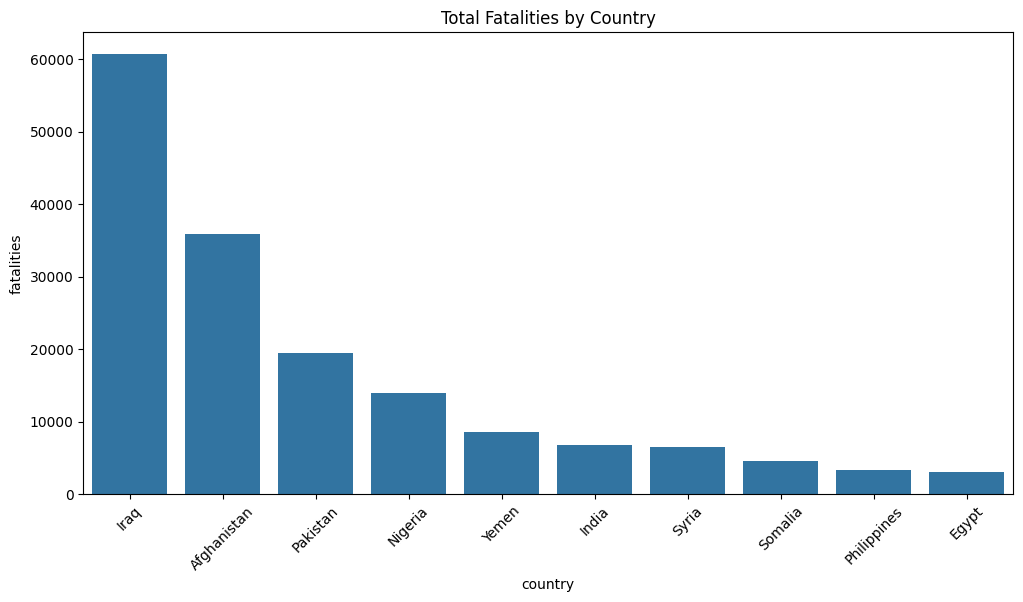

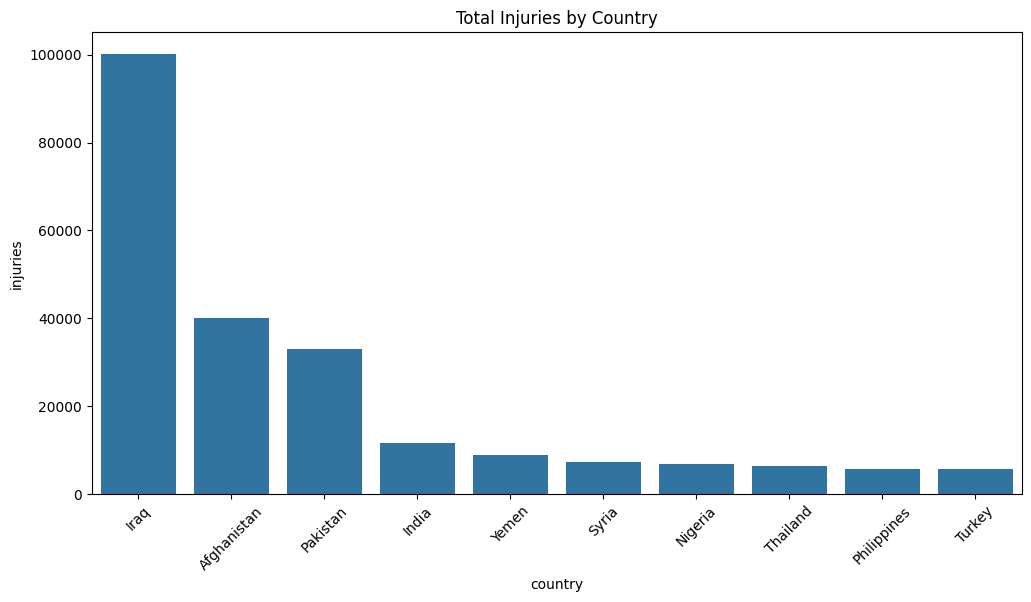

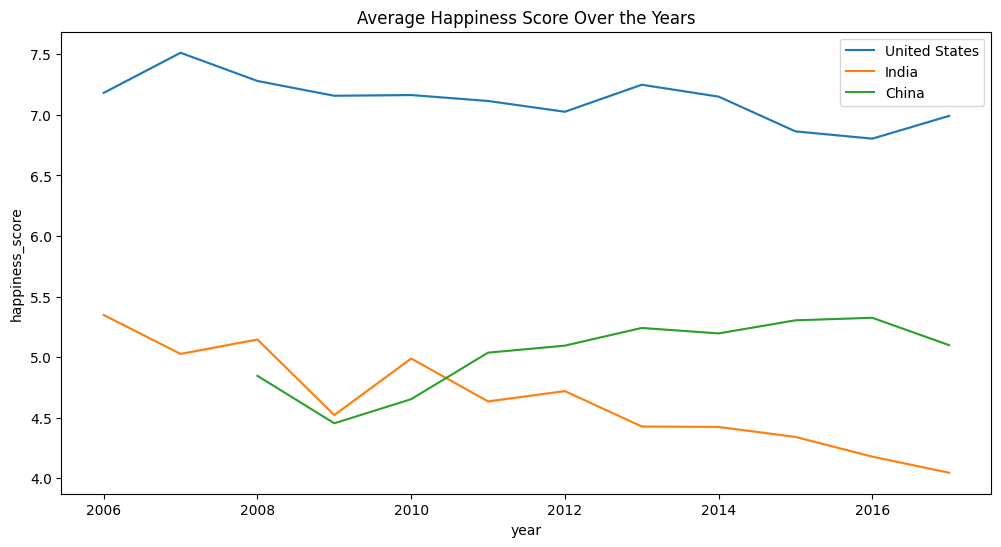

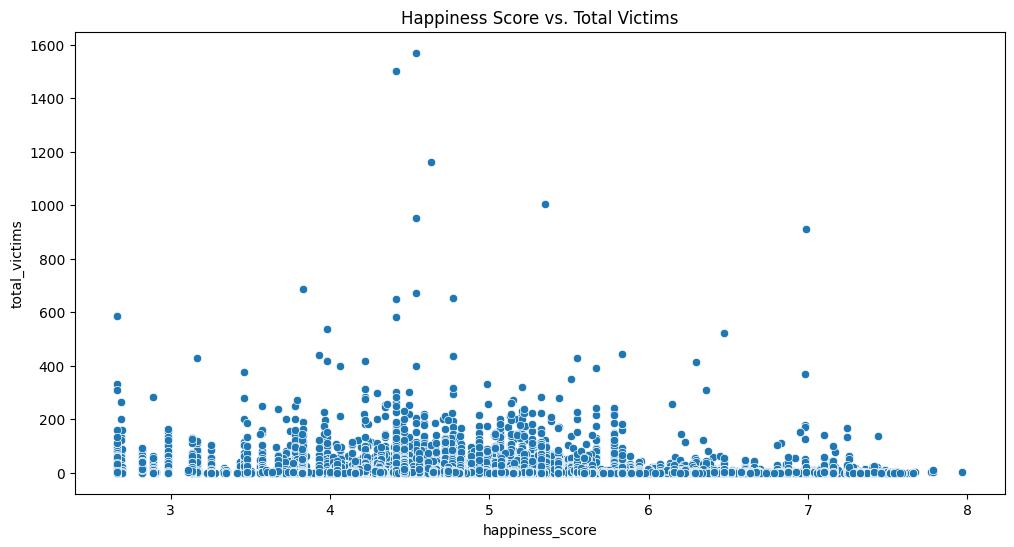

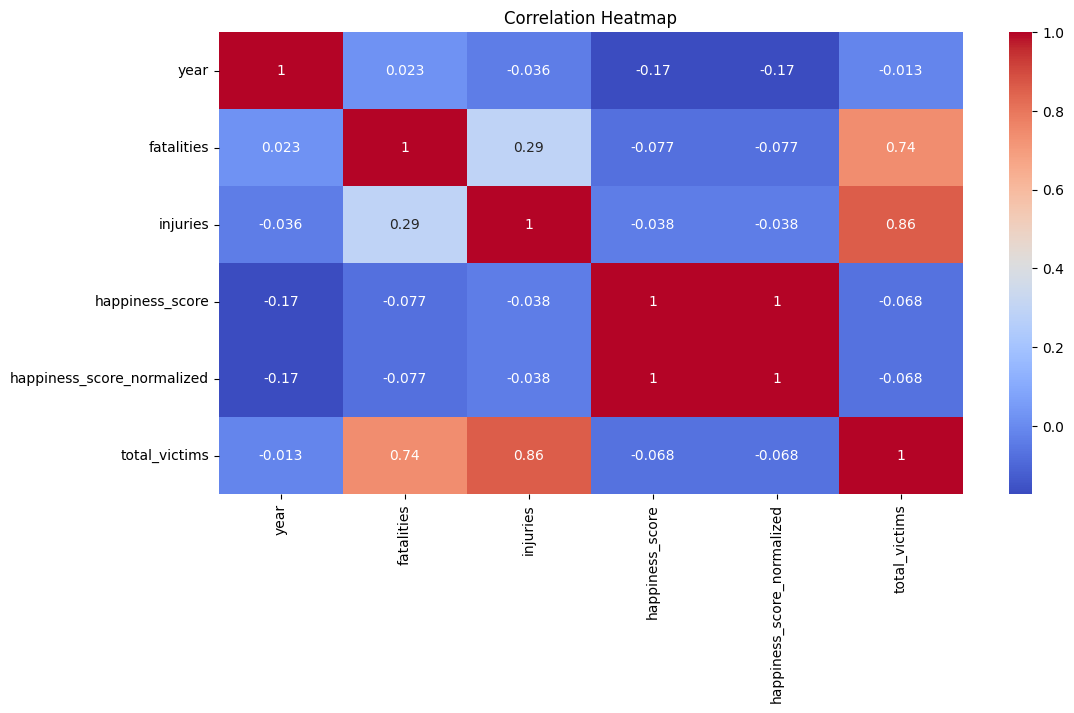

In [36]:
# Plot visualizations
plot_total_fatalities_by_country(country_aggregates)
plot_total_injuries_by_country(country_aggregates)
plot_average_happiness_score_over_years(merged_data, ["United States", "India", "China"])
plot_happiness_score_vs_total_victims(merged_data)
plot_correlation_heatmap(merged_data)

Visualisation:

1. Total Fatalities by Country
Visualization Type: Bar Plot
Description: This plot displays the total number of fatalities caused by terrorism for the top 10 countries with the highest fatalities.
Purpose: To highlight countries that are most severely affected by terrorism in terms of fatalities.
Details:
X-axis: Countries
Y-axis: Number of fatalities
Bars sorted in descending order
Labels rotated for clarity
2. Total Injuries by Country
Visualization Type: Bar Plot
Description: This plot shows the total number of injuries caused by terrorist incidents in the top 10 most affected countries.
Purpose: To emphasize the physical toll of terrorism in terms of injuries.
Details:
X-axis: Countries
Y-axis: Number of injuries
Data sorted in descending order to focus on the most impacted nations.
3. Average Happiness Score Over the Years
Visualization Type: Line Plot
Description: This plot shows the trend of happiness scores for selected countries over a range of years.
Purpose: To explore how happiness levels have changed over time in different nations.
Details:
X-axis: Year
Y-axis: Average happiness score
Multiple lines, each representing a country
A legend to differentiate the countries
Can show rising, declining, or steady trends in happiness.
4. Happiness Score vs. Total Victims
Visualization Type: Scatter Plot
Description: This plot examines the relationship between happiness scores and the total number of victims (fatalities + injuries) from terrorism.
Purpose: To visualize if higher victim counts correlate with lower happiness scores.
Details:
X-axis: Happiness score
Y-axis: Total number of victims
Points represent individual country-year observations
Patterns or clusters might indicate correlations or anomalies.
5. Correlation Heatmap
Visualization Type: Heatmap
Description: A correlation matrix showing the relationships between numerical variables in the dataset, such as fatalities, injuries, and happiness scores.
Purpose: To statistically assess how variables like terrorism metrics (e.g., total incidents) relate to happiness scores.
Details:
Cells are colored based on the strength of correlation:
Positive correlations: Values close to 1
Negative correlations: Values close to -1
Neutral relationships: Values near 0
Annotated with correlation coefficients for precision.
6. Total Terrorist Incidents Over Time
Visualization Type: Line Plot
Description: Tracks the total number of terrorist incidents globally or by country over time.
Purpose: To observe whether terrorist activity is increasing, decreasing, or fluctuating.
Details:
X-axis: Year
Y-axis: Total incidents
Can be segmented by country or shown as a global total.
7. Happiness Scores Distribution
Visualization Type: Histogram or Box Plot
Description: Displays the distribution of happiness scores across all observations.
Purpose: To understand the variability and central tendency of happiness scores.
Details:
X-axis: Happiness score
Y-axis: Frequency (for histogram)
Box plot may show median, quartiles, and outliers.
8. Impact of Terrorism on GDP or Other Metrics
Visualization Type: Scatter Plot or Bar Plot
Description: Examines the potential economic impact of terrorism on metrics like GDP or employment rates.
Purpose: To broaden the analysis beyond happiness and explore economic consequences.
Details:
X-axis: Economic metric (e.g., GDP, employment)
Y-axis: Terrorism metric (e.g., total incidents, casualties)
Trends or clusters can reveal economic vulnerabilities linked to terrorism.

OVER VIEW

Unveiling the Relationship Between Terrorism and Happiness: A Data-Driven Analysis

In an increasingly interconnected world, the dynamics between societal well-being and external shocks have become pivotal in understanding global happiness trends. Among the most impactful events, acts of terrorism stand out for their ability to disrupt lives, economies, and psychological well-being. This project delves into the intricate relationship between terrorism incidents and happiness scores, providing actionable insights to policymakers, researchers, and advocates for global well-being.

Project Overview
The objective of this study is to quantify and visualize the impact of terrorist activities on the happiness of nations. Happiness, a holistic measure of a population’s well-being, incorporates various dimensions such as economic stability, governance, health, and social support. On the other hand, terrorism brings with it not only loss of life and property but also lingering effects on societal trust, economic confidence, and mental health.

By merging datasets on terrorism incidents and happiness scores, this analysis aims to illuminate patterns that may otherwise remain obscured. This work underscores the importance of addressing the root causes of terrorism while simultaneously fostering resilience to safeguard the happiness of affected populations.

Methodology
Data Preparation:
The project begins with meticulous data cleaning and preparation. Missing values, inconsistencies, and formatting issues are resolved to ensure the reliability of the datasets. Key variables such as country, year, and incident details are standardized.

Integration of Datasets:
Terrorism data, including the number of incidents and casualties, is merged with global happiness scores for the corresponding years. This integration enables a comprehensive analysis of how terrorism trends align with happiness metrics.

Data Transformation and Aggregation:
Key metrics, such as total terrorist incidents and casualties, are calculated at the country-year level. Happiness scores are normalized for consistency, and summary statistics are generated to identify trends.

Analysis:
Correlation analysis is employed to quantify the relationship between terrorism and happiness scores. The study investigates whether higher terrorism rates coincide with lower happiness levels and explores potential outliers or anomalies.

Visualization:
A variety of visual tools—scatter plots, heatmaps, and trend graphs—are used to present the findings. These visuals not only make the data more accessible but also enhance the understanding of underlying patterns.

Key Findings and Implications
Preliminary results suggest that nations with higher incidences of terrorism often report declines in happiness scores. The severity of impact varies, influenced by factors like the scale of incidents, the resilience of governance structures, and existing societal conditions. These findings highlight the urgent need for policies that address both the prevention of terrorism and the reinforcement of societal well-being.

Why This Matters
This analysis provides a foundation for informed decision-making. Governments and international organizations can use these insights to allocate resources effectively, develop targeted interventions, and prioritize resilience-building measures. Beyond policymakers, this research is relevant to academics, non-profits, and anyone invested in creating a safer, happier world.

Through this project, we aim to bridge the gap between data and action, inspiring collaborative efforts to enhance the happiness and security of societies worldwide.
